# Clasificación Aviar en Ibagué mediante Deep Learning: Enfoque en Precisión y Eficiencia

El proceso de clasificación aviar en Ibagué, mediante técnicas de Deep Learning, reviste una importancia fundamental en la conservación y el estudio de la biodiversidad de la región. Ibagué, ubicada en una zona geográfica rica en diversidad de aves, se enfrenta a desafíos significativos en la identificación y monitoreo de estas especies. La implementación de un sistema multiclase de identificación aviar no solo facilita la tarea de catalogación para investigadores y conservacionistas, sino que también proporciona una herramienta eficaz para la evaluación del estado de las poblaciones aviares y la detección temprana de posibles amenazas, como la pérdida de hábitat o el cambio climático. Con un enfoque en la precisión y eficiencia del proceso de clasificación, este sistema puede contribuir de manera significativa a la gestión sostenible de los recursos naturales y la protección del medio ambiente en la región de Ibagué.

## Librerias

A continuación se relacionana algunas de las bibliotecas y módulos de Python que se utilizan comúnmente en el desarrollo de aplicaciones de aprendizaje automático,  procesamiento de imágenes y que se utilizaran en este proyecto:

1. **Keras**: Es una biblioteca de redes neuronales de código abierto escrita en Python que facilita la creación y entrenamiento de modelos de aprendizaje profundo. Proporciona una interfaz simple y consistente para construir y entrenar modelos de redes neuronales.

2. **NumPy**: Es una biblioteca fundamental para computación numérica en Python. Se utiliza para realizar operaciones matemáticas en matrices y matrices multidimensionales, lo que es esencial para el procesamiento de datos en el aprendizaje automático.

3. **OpenCV (cv2)**: OpenCV (Open Source Computer Vision Library) es una biblioteca de código abierto que se utiliza para el procesamiento de imágenes y visión por computadora. Proporciona una amplia gama de funciones y algoritmos para tareas como manipulación de imágenes, detección de características, reconocimiento de objetos, seguimiento de objetos, entre otros.

4. **Matplotlib**: Es una biblioteca de trazado en 2D de Python que produce figuras de calidad de publicación en una variedad de formatos y entornos. Se utiliza para visualizar datos y resultados, incluidas imágenes y gráficos.

5. **TensorFlow**: Es una biblioteca de código abierto desarrollada por Google para el aprendizaje automático y la inteligencia artificial. TensorFlow proporciona un ecosistema completo para construir y entrenar modelos de aprendizaje profundo, incluidas API de alto nivel como Keras.

6. **Scikit-learn**: Es una biblioteca de aprendizaje automático de código abierto que proporciona herramientas simples y eficientes para el análisis predictivo y la minería de datos. Incluye una variedad de algoritmos de aprendizaje supervisado y no supervisado, así como herramientas para preprocesamiento de datos, evaluación de modelos y selección de características.

En resumen, estas bibliotecas son componentes clave en el desarrollo de aplicaciones de aprendizaje automático y procesamiento de imágenes, proporcionando herramientas y funciones para construir, entrenar, evaluar y visualizar modelos de manera eficiente.

In [1]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import to_categorical
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Configuración de parámetros

Es crucial establecer los parámetros específicos, como el tamaño de las imágenes de entrada (width_shape y height_shape), el número de clases a predecir (num_classes), así como los hiperparámetros de entrenamiento, como el número de épocas (epochs) y el tamaño del lote (batch_size), antes de iniciar el proceso de entrenamiento de un modelo de aprendizaje profundo para la clasificación de imágenes. Estos parámetros tienen un impacto significativo en la calidad y eficiencia del modelo resultante. Por ejemplo, el tamaño de las imágenes de entrada afecta la capacidad del modelo para capturar detalles importantes de las imágenes, mientras que el número de clases determina la complejidad de la tarea de clasificación. Además, la configuración adecuada de los hiperparámetros de entrenamiento, como el número de épocas y el tamaño del lote, es esencial para garantizar un entrenamiento efectivo y eficiente del modelo, evitando el sobreajuste o el subajuste. Por lo tanto, la correcta especificación de estos parámetros es fundamental para lograr resultados precisos y confiables en el proceso de clasificación de imágenes.

In [6]:
width_shape = 224
height_shape = 224
num_classes = 10
epochs = 8
batch_size = 512

Este código define algunas variables que son comunes al entrenar modelos de aprendizaje profundo para clasificación de imágenes:

- `width_shape` y `height_shape`: Estas variables representan el ancho y la altura de las imágenes de entrada al modelo. En este caso, las imágenes se están redimensionando a una forma cuadrada de 224x224 píxeles. Es común redimensionar las imágenes de entrada a un tamaño específico antes de alimentarlas al modelo.

- `num_classes`: Esta variable indica el número de clases en el problema de clasificación. En este caso, el modelo se entrenará para clasificar imágenes en 10 clases diferentes.

- `epochs`: Este parámetro especifica el número de épocas o iteraciones completas sobre el conjunto de datos durante el entrenamiento del modelo. Cada época implica pasar por todo el conjunto de datos una vez hacia adelante y hacia atrás a través de la red neuronal.

- `batch_size`: Este parámetro indica el tamaño del lote de datos que se utilizará en cada iteración de entrenamiento. Durante el entrenamiento, los datos se dividen en lotes y se procesan en paralelo, lo que puede acelerar el proceso de entrenamiento y hacerlo más eficiente en términos de uso de memoria. Un valor típico para `batch_size` es 32, lo que significa que se procesarán 32 imágenes a la vez durante cada iteración de entrenamiento.

# Path de dataset

Estos son los directorios donde se almacenan los datos de entrenamiento y validación respectivamente para el modelo. Es una práctica común dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de validación para evaluar el rendimiento del modelo durante el entrenamiento.

In [4]:
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/TFMaves/dataset/train'
validation_data_dir = '/content/drive/MyDrive/Colab Notebooks/TFMaves/dataset/valid'


- `train_data_dir`: Este directorio contiene las imágenes de entrenamiento. Por lo general, se espera que contenga subdirectorios separados para cada clase (cada tipo de ave) de imagen, donde las imágenes de cada clase se agrupan juntas.

- `validation_data_dir`: Este directorio contiene las imágenes de validación, que se utilizan para evaluar el rendimiento del modelo en un conjunto de datos independiente durante el entrenamiento. Al igual que con el directorio de entrenamiento, se espera que este directorio contenga subdirectorios separados para cada clase de imagen.

La estructura de directorios esperada por los generadores de datos de Keras o TensorFlow para tareas de clasificación de imágenes suele ser la siguiente:

```
dataset/
├── train/
│   ├── class1/
│   │   ├── image1.jpg
│   │   ├── image2.jpg
│   │   └── ...
│   ├── class2/
│   │   ├── image1.jpg
│   │   ├── image2.jpg
│   │   └── ...
│   └── ...
└── valid/
    ├── class1/
    │   ├── image1.jpg
    │   ├── image2.jpg
    │   └── ...
    ├── class2/
    │   ├── image1.jpg
    │   ├── image2.jpg
    │   └── ...
    └── ...
```

En esta estructura:

- El directorio `train` contiene subdirectorios separados para cada clase de imagen.
- Cada subdirectorio de clase (`class1`, `class2`, etc.) contiene las imágenes correspondientes a esa clase.
- El directorio `valid` tiene una estructura similar al directorio de entrenamiento y se utiliza para almacenar las imágenes de validación.

Es importante seguir esta estructura de directorios para que los generadores de datos de Keras o TensorFlow puedan encontrar y cargar correctamente las imágenes durante el entrenamiento y la validación del modelo. Si los datos no están organizados de esta manera, los generadores de datos pueden tener dificultades para encontrar las imágenes y el proceso de entrenamiento puede fallar o producir resultados incorrectos.

# Generador de imágenes para las imagenes de `train`  y `valid`

Los generadores de imágenes son fundamentales para cargar y procesar los datos de entrenamiento y validación de manera eficiente durante el entrenamiento del modelo de clasificación de imágenes. Además, aplican aumentos de datos en tiempo real durante el entrenamiento, lo que ayuda a mejorar la capacidad del modelo para generalizar a nuevos datos.

In [7]:
# Definir el generador de imágenes para el conjunto de entrenamiento con aumentos de datos
train_datagen = ImageDataGenerator(
    rotation_range=20,               # Rango de grados para rotación aleatoria
    zoom_range=0.2,                  # Rango de zoom aleatorio
    width_shift_range=0.1,           # Rango de desplazamiento horizontal aleatorio
    height_shift_range=0.1,          # Rango de desplazamiento vertical aleatorio
    horizontal_flip=True,            # Volteo horizontal aleatorio
    vertical_flip=False,             # No se aplica volteo vertical
    preprocessing_function=preprocess_input) # Función de preprocesamiento


# Definir el generador de imágenes para el conjunto de validación con los mismos aumentos de datos
valid_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input) # Función de preprocesamiento

# Crear un generador de lotes de imágenes para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_data_dir,                  # Directorio que contiene las imágenes de entrenamiento
    target_size=(width_shape, height_shape),  # Tamaño al que se redimensionarán las imágenes
    batch_size=batch_size,           # Tamaño del lote
    class_mode='categorical')        # Modo de clasificación para imágenes categóricas

# Crear un generador de lotes de imágenes para el conjunto de validación
validation_generator = valid_datagen.flow_from_directory(
    validation_data_dir,             # Directorio que contiene las imágenes de validación
    target_size=(width_shape, height_shape),  # Tamaño al que se redimensionarán las imágenes
    batch_size=batch_size,           # Tamaño del lote
    class_mode='categorical')        # Modo de clasificación para imágenes categóricas


Found 10000 images belonging to 10 classes.
Found 960 images belonging to 10 classes.


# Entrenamiento de modelo VGG16

A continuación, se configura y entrena un modelo de red neuronal convolucional (CNN) utilizando la arquitectura VGG16 preentrenada para la clasificación de imágenes. Primero, se establecen variables para el número de muestras de entrenamiento y validación. Luego, se define la estructura de entrada de la red neuronal y se carga el modelo VGG16 preentrenado con sus pesos ajustados a partir del conjunto de datos ImageNet. Se añade una capa densa adicional para adaptar la salida a la cantidad de clases en el problema de clasificación y se congela el resto de las capas para evitar que se modifiquen durante el entrenamiento. Posteriormente, el modelo se compila con una función de pérdida y un optimizador específicos, y se muestra un resumen de la arquitectura del modelo. Finalmente, se lleva a cabo el entrenamiento del modelo utilizando generadores de datos para el conjunto de entrenamiento y validación, con la configuración de épocas y pasos definida previamente. Durante el entrenamiento, se actualizan únicamente los pesos de la capa densa añadida, mientras que los pesos de las capas preentrenadas permanecen constantes debido a la congelación previa.

## **Regularización** L2

Se agrega regularización L2 a la capa densa utilizando el parámetro kernel_regularizer='l2'. La regularización L2 es una técnica comúnmente utilizada para prevenir el sobreajuste en modelos de aprendizaje automático al penalizar los pesos grandes en la función de pérdida. Esto puede ayudar a mejorar la generalización del modelo, especialmente cuando se tienen conjuntos de datos pequeños o complejos.

In [8]:
from keras.callbacks import LearningRateScheduler  # Importar LearningRateScheduler
import keras.backend as K

# Definir el número de muestras de entrenamiento y validación
nb_train_samples = 10000
nb_validation_samples = 960

# Definir la entrada de la red neuronal con el tamaño de las imágenes
image_input = Input(shape=(width_shape, height_shape, 3))

# Cargar el modelo VGG16 preentrenado con pesos ajustados desde ImageNet
model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')

# Obtener la salida de la penúltima capa densa del modelo VGG16 (fc2)
last_layer = model.get_layer('fc2').output

# Añadir una nueva capa densa al final del modelo para la clasificación multiclase con regularización L2 (Evita sobreajuste)
out = Dense(num_classes, activation='softmax', kernel_regularizer='l2', name='output')(last_layer)

# Crear un nuevo modelo personalizado que toma la entrada de la imagen y produce la salida clasificada
custom_vgg_model = Model(image_input, out)

# Congelar todas las capas del modelo, excepto la capa densa añadida
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

# Compilar el modelo con una función de pérdida, optimizador y métricas especificadas
custom_vgg_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Definir una función que reduzca la tasa de aprendizaje a la mitad cada 5 épocas
def lr_schedule(epoch):
    if epoch % 5 == 0 and epoch != 0:
        lr = K.get_value(custom_vgg_model.optimizer.lr)
        K.set_value(custom_vgg_model.optimizer.lr, lr * 0.5)
        print("Learning rate reduced to:", lr * 0.5)
    return K.get_value(custom_vgg_model.optimizer.lr)

# Crear un callback para ajustar dinámicamente la tasa de aprendizaje
lr_scheduler = LearningRateScheduler(lr_schedule)

# Mostrar un resumen del modelo que incluye la arquitectura y el número de parámetros
custom_vgg_model.summary()

# Entrenar el modelo utilizando generadores de datos para el conjunto de entrenamiento y validación
model_history = custom_vgg_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,  # Número de pasos por época de entrenamiento
    validation_steps=nb_validation_samples//batch_size,  # Número de pasos por época de validación
    callbacks=[lr_scheduler],# Añadir el callback de la tasa de aprendizaje
    workers=32)  # Ajustar según la capacidad de la TPU



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Este código realiza las siguientes operaciones en general:

1. **Definición de variables:** Se definen dos variables `nb_train_samples` y `nb_validation_samples` para indicar el número de muestras de entrenamiento y validación respectivamente. Estas variables se utilizan más adelante para configurar el entrenamiento del modelo.

2. **Definición de la entrada de la red neuronal:** Se define la entrada de la red neuronal utilizando la clase `Input` de Keras. La forma de la entrada se especifica como `(width_shape, height_shape, 3)`, lo que indica el tamaño de las imágenes de entrada y el número de canales de color (en este caso, 3 para imágenes RGB).

3. **Carga del modelo preentrenado VGG16:** Se carga el modelo preentrenado VGG16 utilizando la función `VGG16` de Keras. Se especifica el tensor de entrada de la red neuronal (`input_tensor=image_input`), se incluye la capa densa al final del modelo (`include_top=True`) y se cargan los pesos preentrenados en el conjunto de datos de ImageNet (`weights='imagenet'`).

4. **Creación de un nuevo modelo personalizado:** Se crea un nuevo modelo personalizado que incluye todas las capas de la VGG16 hasta la última capa densa (`fc2`). Se agrega una capa densa adicional al final del modelo con un número de unidades igual al número de clases en el problema (`num_classes`). Esta capa tiene una función de activación softmax, lo que la convierte en una clasificación de salida.

5. **Congelación de capas:** Se congela todas las capas del modelo preentrenado VGG16, excepto la última capa densa añadida. Esto se hace para que durante el entrenamiento solo se actualicen los pesos de la nueva capa densa.

6. **Compilación del modelo:** Se compila el modelo personalizado utilizando la función de pérdida `categorical_crossentropy`, el optimizador `adadelta` y se incluye la métrica de precisión (`accuracy`).

7. **Resumen del modelo:** Se muestra un resumen del modelo, que incluye todas las capas y el número total de parámetros entrenables y no entrenables.

8. **Entrenamiento del modelo:** Se entrena el modelo utilizando los generadores de datos `train_generator` y `validation_generator` que se definieron anteriormente. Se especifica el número de épocas (`epochs`) y el número de pasos por época (`steps_per_epoch`) y de validación (`validation_steps`). Durante el entrenamiento, se actualizan los pesos de la capa densa añadida mientras que los pesos de las capas de VGG16 se mantienen fijos debido a la congelación realizada anteriormente.

# Grabar modelo en disco

Guardar el modelo tiene varias ventajas. En primer lugar, permite la reutilización futura, ya que puedes cargarlo y utilizarlo nuevamente sin necesidad de volver a entrenarlo desde cero, lo que resulta útil tanto para hacer predicciones en nuevos datos como para continuar el entrenamiento en una fecha posterior. Además, facilita la distribución y compartición del modelo con otros investigadores, colegas o clientes que puedan necesitar utilizarlo en sus propios proyectos. Por último, al guardar el modelo junto con su configuración y pesos entrenados, se asegura la reproducibilidad de los resultados, ya que otros investigadores pueden cargar el modelo exacto y obtener los mismos resultados que tú, lo que es fundamental para la validación y la comparación de resultados en investigación científica y desarrollo de modelos.

In [ ]:
custom_vgg_model.save("models/model_VGG16_v2_os.keras")

Este código utilizará un bucle while para verificar si el archivo con el nombre base del modelo ya existe. Si existe, agregará un número al final del nombre del archivo y verificará nuevamente. Esto continuará hasta que se encuentre un nombre de archivo único que no exista en el directorio. Una vez que se encuentra un nombre único, el modelo se guarda con ese nombre.

In [9]:
import os

# Nombre base del modelo
model_name = "model_VGG16_v"

# Extensión del archivo
file_extension = ".keras"

# Directorio donde se guardarán los modelos
model_directory = "/content/drive/MyDrive/Colab Notebooks/TFMaves/models/"

# Inicializar contador
counter = 1

# Generar el nombre completo del archivo
file_name = model_name + file_extension

ruta=model_directory + file_name
print(ruta)
# Verificar si el modelo ya está guardado
while os.path.exists(model_directory + file_name):

    # Si el archivo existe, agregar un número al final del nombre del modelo
    file_name = f"{model_name}{counter}{file_extension}"
    counter += 1

# Guardar el modelo con el nombre único en el directorio correcto
custom_vgg_model.save(model_directory + file_name)

/content/drive/MyDrive/Colab Notebooks/TFMaves/models/model_VGG16_v.keras


# Gráficas de entrenamiento y validación (accuracy - loss)

In [10]:
def plotTraining(hist, epochs, typeData):

    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')


    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18)
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

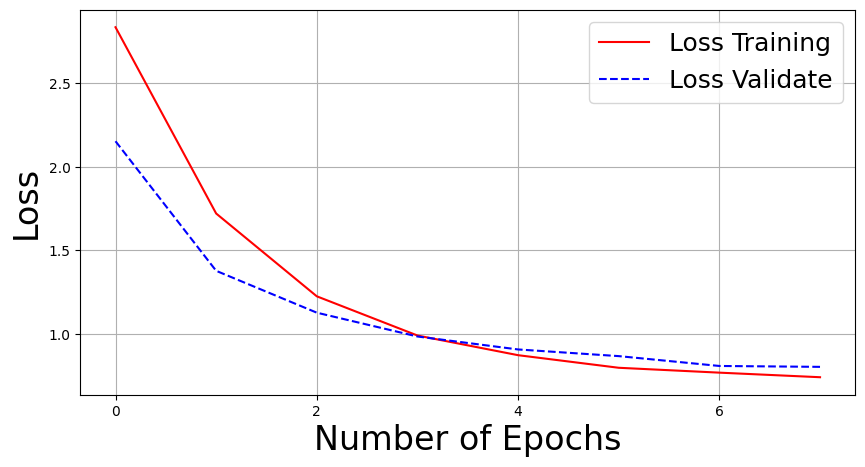

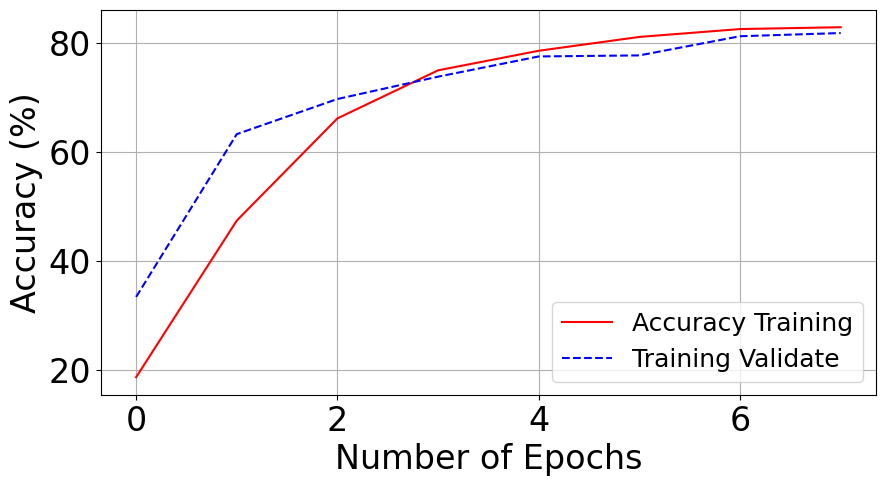

In [11]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")

# Predicción usando el modelo entrenado

1/1 [==============================] - 0s 279ms/step
TIARIS OLIVACEUS


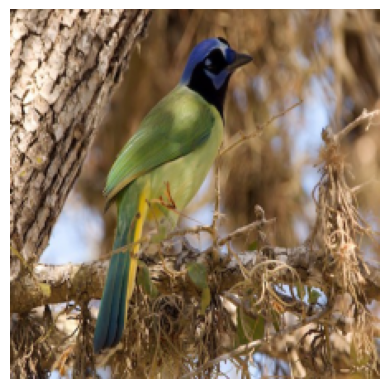

In [14]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['CYANOCORAX YNCAS','PIRANGA RUBRA','PITANGUS SULPHURATUS','PYROCEPHALUS RUBINUS','RUPORNIS MAGNIROSTRIS',
         'SICALIS FLAVEOLA','THRAUPIS EPISCOPUS','TIARIS OLIVACEUS','TYRANNUS MELANCHOLICUS','ZONOTRICHIA CAPENSIS']

modelt = load_model("/content/drive/MyDrive/Colab Notebooks/TFMaves/models/model_VGG16_v.keras")
#modelt = custom_vgg_model

imaget_path = "/content/drive/MyDrive/Colab Notebooks/TFMaves/ImagenPrueba.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Matriz de confusión y métricas de desempeño

Found 500 images belonging to 10 classes.
1/1 [==============================] - 11s 11s/step
              precision    recall  f1-score   support

           0     0.7250    0.5800    0.6444        50
           1     0.0000    0.0000    0.0000        50
           2     0.8800    0.4400    0.5867        50
           3     0.2414    0.1400    0.1772        50
           4     0.5625    0.5400    0.5510        50
           5     0.5385    0.1400    0.2222        50
           6     0.1026    0.4800    0.1690        50
           7     0.5000    0.2400    0.3243        50
           8     0.5000    0.1600    0.2424        50
           9     0.5000    0.5200    0.5098        50

    accuracy                         0.3240       500
   macro avg     0.4550    0.3240    0.3427       500
weighted avg     0.4550    0.3240    0.3427       500



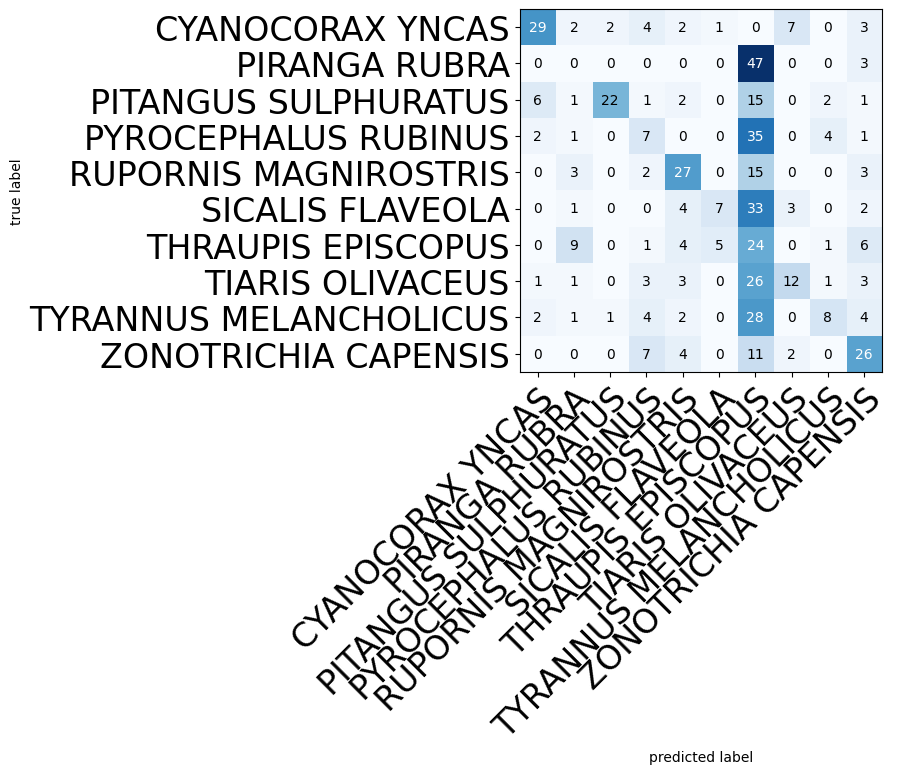

In [18]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


names = ['CYANOCORAX YNCAS','PIRANGA RUBRA','PITANGUS SULPHURATUS','PYROCEPHALUS RUBINUS','RUPORNIS MAGNIROSTRIS',
         'SICALIS FLAVEOLA','THRAUPIS EPISCOPUS','TIARIS OLIVACEUS','TYRANNUS MELANCHOLICUS','ZONOTRICHIA CAPENSIS']


test_data_dir = '/content/drive/MyDrive/Colab Notebooks/TFMaves/dataset/test'

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

custom_Model= load_model("/content/drive/MyDrive/Colab Notebooks/TFMaves/models/model_VGG16_v.keras")

predictions = custom_Model.predict(test_generator)


y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names = names, show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))

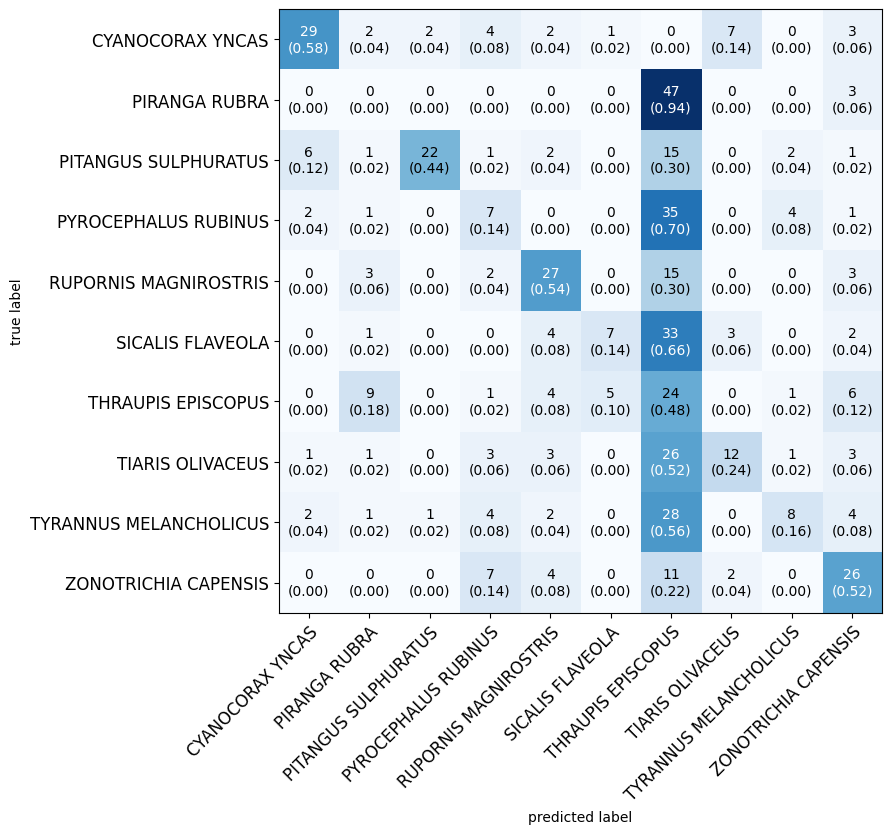

In [19]:
# Define el tamaño de la figura y los nombres de las clases
fig, ax = plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names=names, show_normed=True)

# Ajusta el tamaño de las letras de los nombres de las clases
ax.set_xticklabels(names, fontsize=12)  # Ajusta el tamaño de las letras en el eje x
ax.set_yticklabels(names, fontsize=12)  # Ajusta el tamaño de las letras en el eje y

# Ajusta automáticamente el diseño de la figura
plt.tight_layout()

# Muestra la figura
plt.show()

In [16]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.7 MB/s eta 0:00:00


# Transfer Learning modelo VGG16 - fine tune

In [ ]:
# Importar las funciones necesarias de Keras
from keras.layers import Input
from keras.applications import VGG16

# Definir la forma de entrada para las imágenes (ancho, alto, canales RGB)
image_input = Input(shape=(width_shape, height_shape, 3))

# Crear el modelo VGG16 utilizando la entrada de imagen definida
# include_top=True significa que se incluirán todas las capas densas en la parte superior del modelo
# weights='imagenet' significa que se utilizarán los pesos pre-entrenados en ImageNet
model2 = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')

# Mostrar un resumen de la arquitectura del modelo
model2.summary()


In [ ]:
last_layer = model2.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()

# freeze all the layers except the dense layers
for layer in custom_model.layers[:-3]:
	layer.trainable = False

custom_model.summary()

custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [ ]:
# Definir el número de muestras de entrenamiento y validación
nb_train_samples = 1490
nb_validation_samples = 50

model_history = custom_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

In [ ]:
custom_model.save("models/model_VGG16_50.keras")

In [ ]:
def plotTraining(hist, epochs, typeData):

    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')


    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18)
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

In [ ]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")

La validación oscila tanto porque podría haber un problema de sobreajuste (overfitting) o la necesidad de ajustar los hiperparámetros. El modelo parece estar aprendiendo bien durante el entrenamiento, como se muestra en la línea roja continua “Accuracy Training”, pero tiene un rendimiento inconsistente en los datos de validación, indicado por la línea azul punteada “Training Validate”.

Para abordar esto:

Regularización: Introduce técnicas de regularización como dropout o weight decay para reducir el sobreajuste.
Ajuste de Hiperparámetros: Experimenta con diferentes valores para hiperparámetros como tasa de aprendizaje, número de capas ocultas, etc.
Más Datos: Si es posible, aumenta el tamaño del conjunto de datos de entrenamiento.
Early Stopping: Detén el entrenamiento cuando la precisión de validación deja de mejorar.
El gráfico muestra que el modelo necesita más ajustes para generalizar mejor a datos no vistos

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


names = ['AFRICAN FIREFINCH','ALBATROSS','ALEXANDRINE PARAKEET','AMERICAN AVOCET','AMERICAN BITTERN',
         'AMERICAN COOT','AMERICAN GOLDFINCH','AMERICAN KESTREL','AMERICAN PIPIT','AMERICAN REDSTART']


test_data_dir = 'C:/Users/DIAZOVIEDO/Documents/GitHub/TFMaves/dataset/test'

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

custom_Model50= load_model("models/model_VGG16_50.keras")

predictions = custom_Model50.predict(test_generator)


y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names = names, show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))